# Kaggle - Titanic Competition


In [1]:
# data analysis stack
import numpy as np
import pandas as pd

# Import train-test-split
from sklearn.model_selection import train_test_split

# data visualization stack
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# machine learning stack
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    MinMaxScaler
)
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# miscellaneous
import warnings
warnings.filterwarnings("ignore")
import os


# Read the data (downloaded from Kaggle)

In [2]:
# Get data and current directories
current_directory = os.getcwd()
data_folder = "../../../Spiced/weekly_milestones/week_02/Machine_Learning_Workflow/data/titanic/"


In [3]:
# Construct relative paths
train_file = os.path.join(current_directory, data_folder, "train.csv")
test_file = os.path.join(current_directory, data_folder, "test.csv")

In [4]:
# Read files using relative paths 
train_data = pd.read_csv(train_file)

In [6]:
train_data.shape

(891, 12)

In [7]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Train-Validation split

In [10]:
#define target and initial predictors
X = train_data.drop('Survived' ,axis= 1)
y = train_data['Survived']

In [11]:
X.shape, y.shape

((891, 11), (891,))

In [12]:
Xtrain, Xval, ytrain, yval = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=101,
    stratify=y
)

# EDA

### General Data Overview ###

In [14]:
#add Xtrain and ytrain together to explore data without validation part but with target column
df_train = Xtrain
df_train['Survived'] = ytrain

In [15]:
df_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
702,703,3,"Barbara, Miss. Saiide",female,18.0,0,1,2691,14.4542,NaN,C,0
776,777,3,"Tobin, Mr. Roger",male,NaN,0,0,383121,7.7500,F38,Q,0
381,382,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C,1
275,276,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,1
16,17,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q,0
...,...,...,...,...,...,...,...,...,...,...,...,...
353,354,3,"Arnold-Franchi, Mr. Josef",male,25.0,1,0,349237,17.8000,NaN,S,0
137,138,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S,0
494,495,3,"Stanley, Mr. Edward Roland",male,21.0,0,0,A/4 45380,8.0500,NaN,S,0
430,431,1,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",male,28.0,0,0,110564,26.5500,C52,S,1


In [16]:
df_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,712.000000,712.000000,573.000000,712.000000,712.000000,712.000000,712.000000
mean,441.801966,2.308989,29.638307,0.528090,0.404494,32.633151,0.383427
std,257.278303,0.838610,14.360191,1.110896,0.846525,49.332935,0.486563
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,224.750000,2.000000,20.000000,0.000000,0.000000,7.917700,0.000000
50%,436.500000,3.000000,28.000000,0.000000,0.000000,14.500000,0.000000
75%,664.250000,3.000000,38.000000,1.000000,0.000000,31.275000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


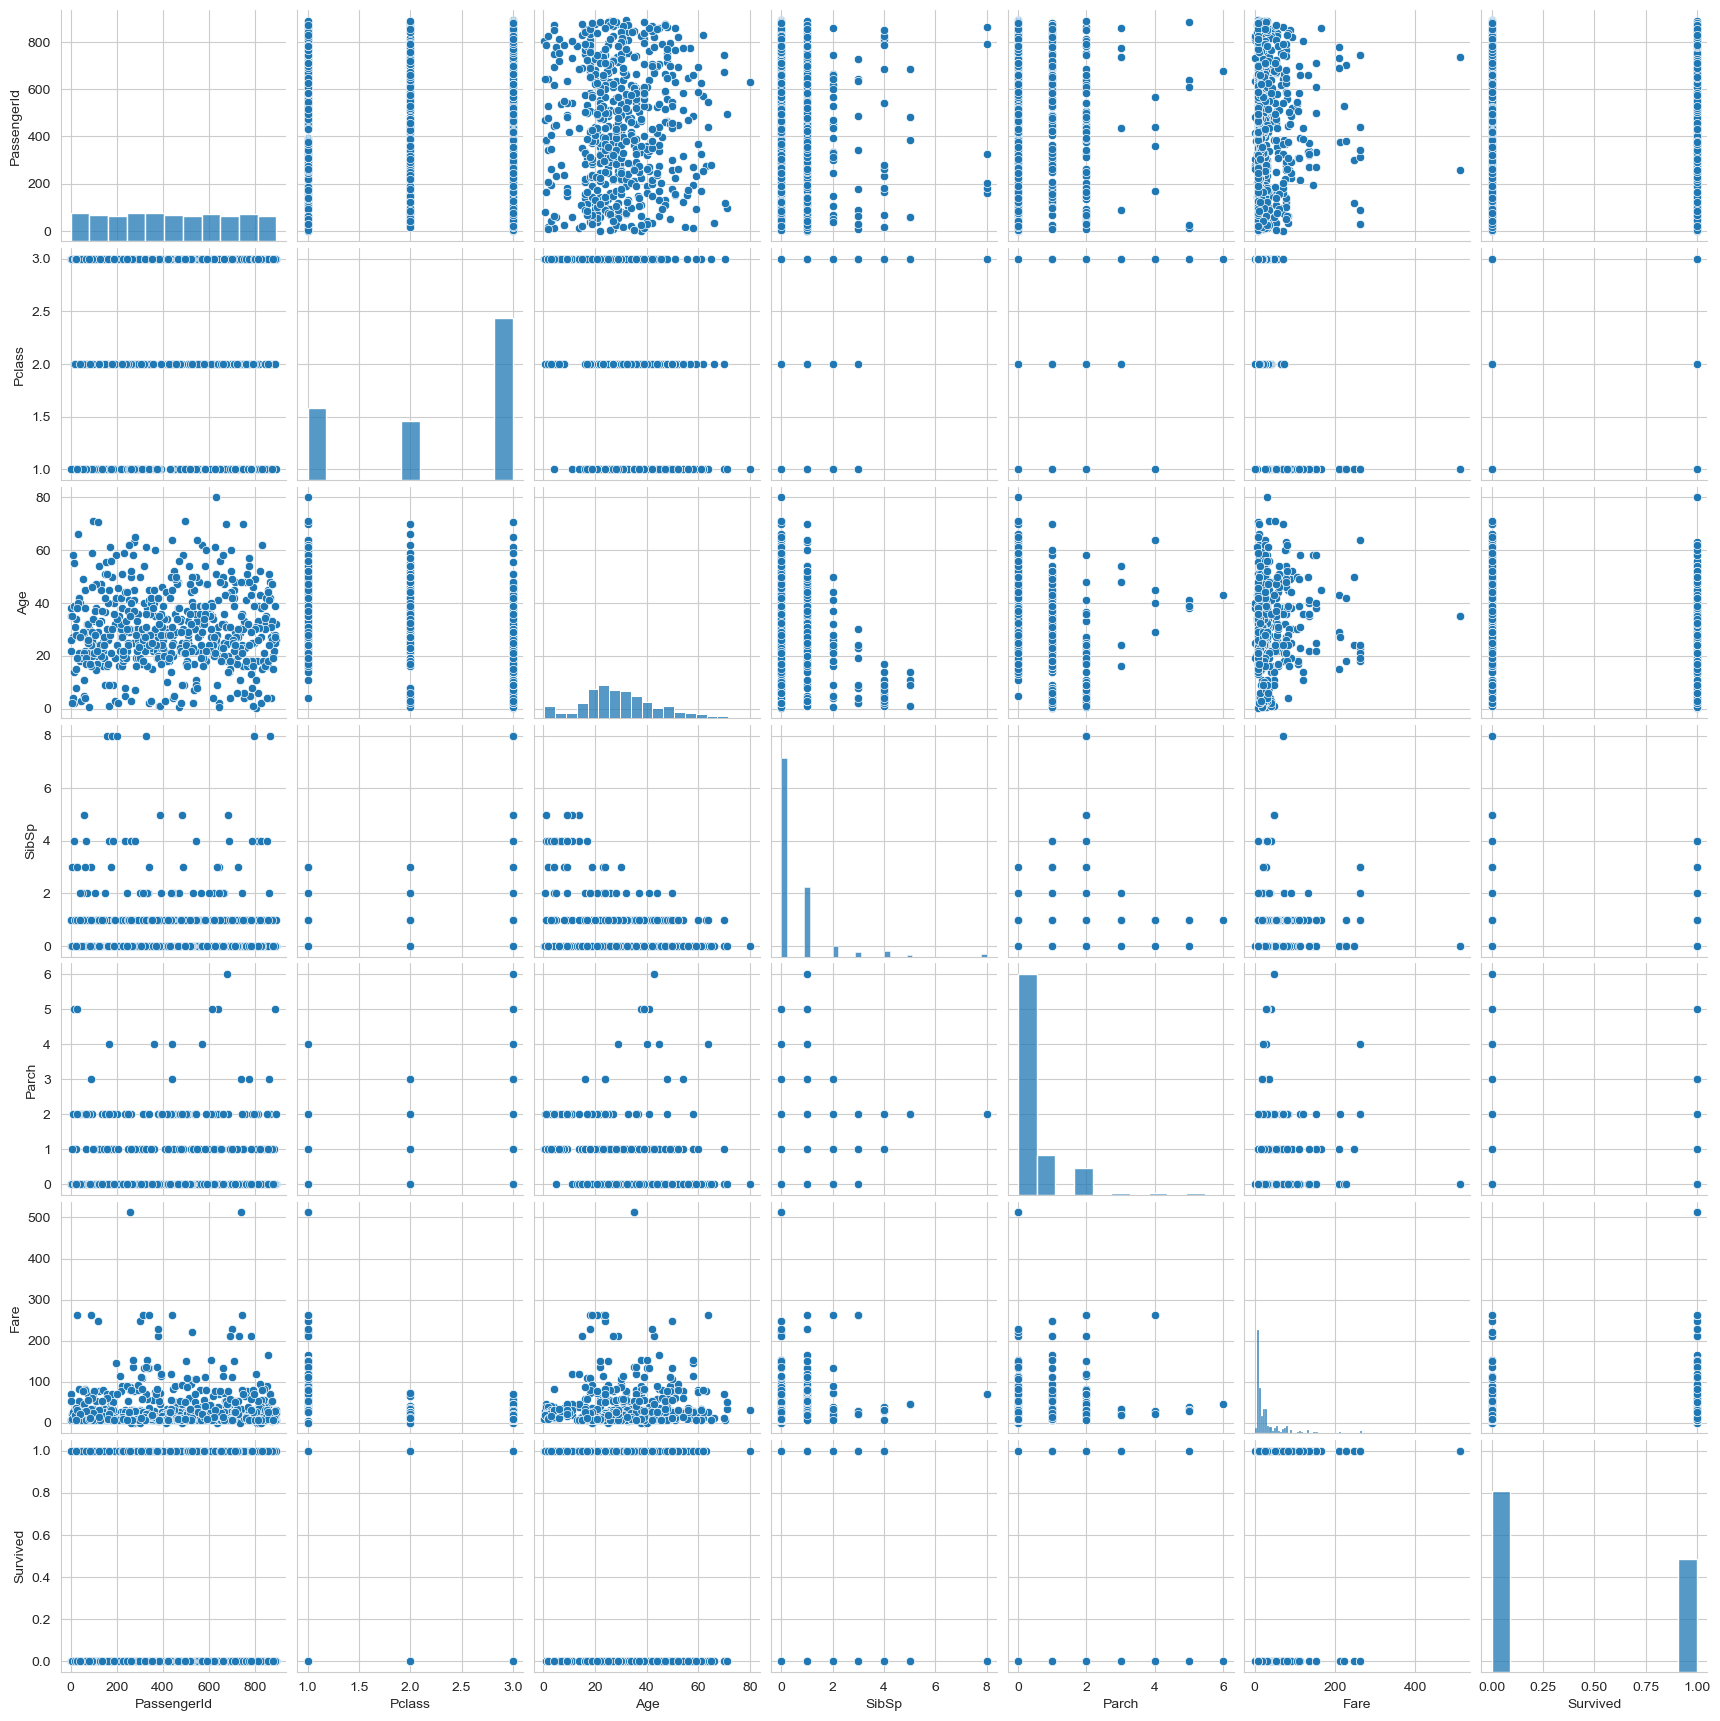

In [17]:
#Check distribution of each variable, and the relationship between each pair of variables
sns.pairplot(df_train)

In [18]:
#see the correlation bw features and target 
corr_matrix = df_train.corr().abs()
corr_matrix

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
PassengerId,1.000000,0.038262,0.015196,0.034455,0.005250,0.010409,0.012068
Pclass,0.038262,1.000000,0.386442,0.087292,0.027759,0.558522,0.335572
Age,0.015196,0.386442,1.000000,0.293616,0.161333,0.112784,0.076713
SibSp,0.034455,0.087292,0.293616,1.000000,0.409662,0.171031,0.031663
Parch,0.005250,0.027759,0.161333,0.409662,1.000000,0.204016,0.080495
Fare,0.010409,0.558522,0.112784,0.171031,0.204016,1.000000,0.258441
Survived,0.012068,0.335572,0.076713,0.031663,0.080495,0.258441,1.000000


<Axes: >

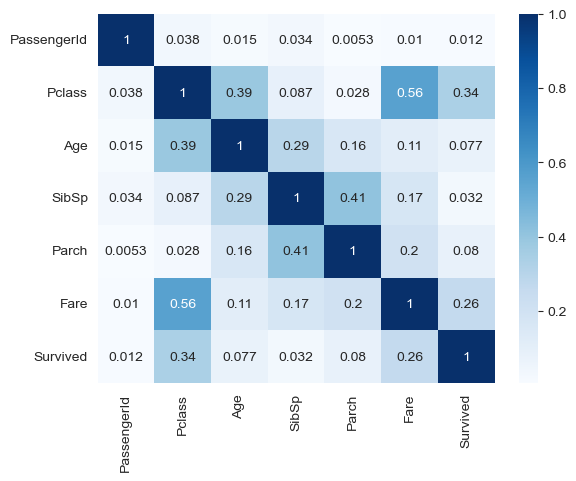

In [19]:
sns.heatmap(data=corr_matrix, robust=True, cmap ="Blues",annot =  True)

In [20]:
spearman_matrix = df_train.corr(method='spearman').abs()
spearman_matrix

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
PassengerId,1.000000,0.034446,0.021952,0.029729,0.010567,0.008457,0.012178
Pclass,0.034446,1.000000,0.368257,0.024257,0.019937,0.678897,0.338513
Age,0.021952,0.368257,1.000000,0.144407,0.239422,0.146656,0.058456
SibSp,0.029729,0.024257,0.144407,1.000000,0.457840,0.446262,0.087142
Parch,0.010567,0.019937,0.239422,0.457840,1.000000,0.406789,0.150667
Fare,0.008457,0.678897,0.146656,0.446262,0.406789,1.000000,0.321965
Survived,0.012178,0.338513,0.058456,0.087142,0.150667,0.321965,1.000000


<Axes: >

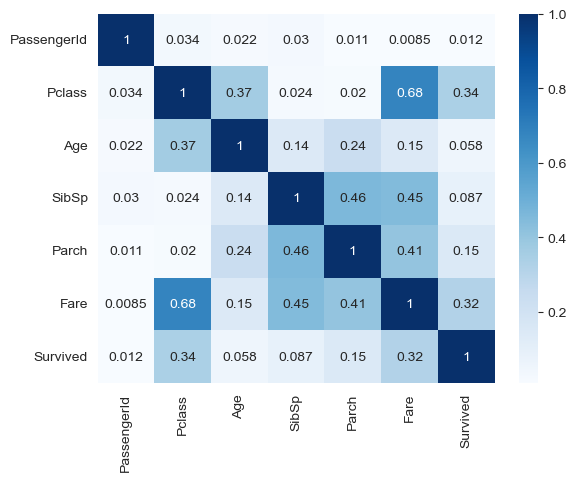

In [21]:
sns.heatmap(data=spearman_matrix, robust=True, cmap ="Blues",annot =  True)

### Missing Values

In [22]:
#see the missing values 
df_train.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            139
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          550
Embarked         2
Survived         0
dtype: int64

<Axes: >

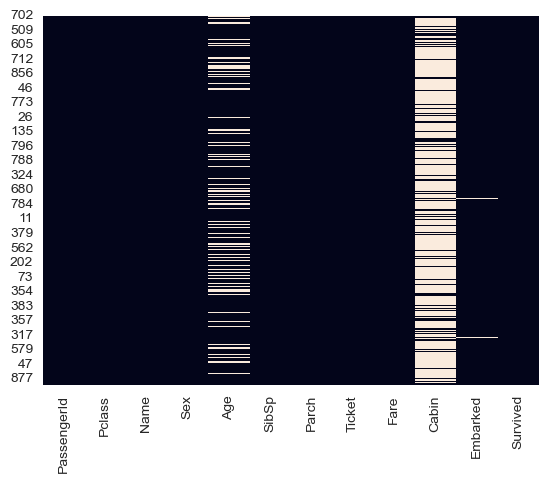

In [23]:
sns.heatmap(df_train.isna(), cbar=False)

### Age ###

It is highly correlated with Pclass (0.39 and 0.37 in corr matrixes above). Is it also unevenly distrivuted between sexes of the passengesr, let's take a closer look at these 3 features

Survivals per passenger class

<Axes: title={'center': 'Survivors per class'}, xlabel='Pclass'>

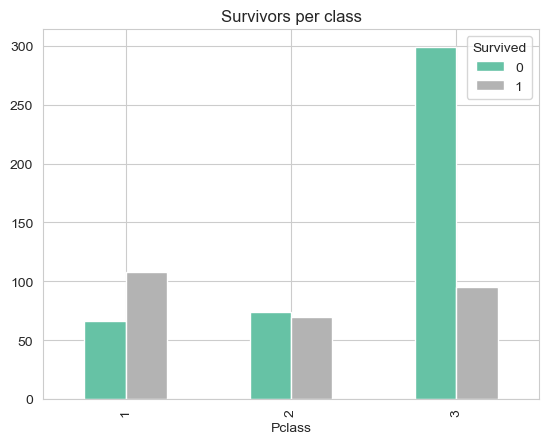

In [24]:
#checking distrivution of survival rates per class
pclass = df_train.groupby(['Pclass', 'Survived']).size().unstack()
pclass.plot(kind = 'bar', title = 'Survivors per class', colormap = 'Set2')

Sex of passengers in each class

<Axes: xlabel='Pclass'>

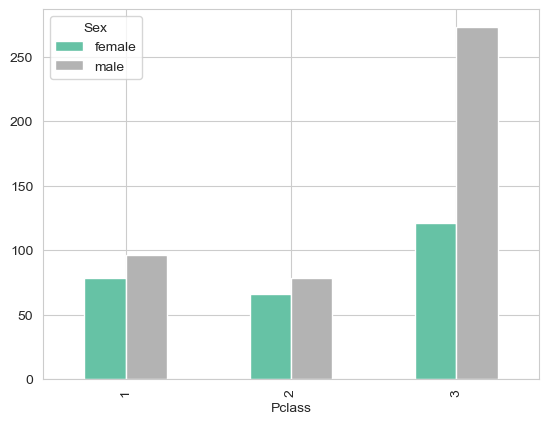

In [25]:
sex_vs_class = df_train.groupby(['Sex', 'Pclass']).size().reset_index(name='counts')
sex_vs_class.pivot(index='Pclass', columns='Sex', values='counts').plot.bar(colormap = 'Set2')

sex of survived passengers in each class

<Axes: xlabel='Pclass'>

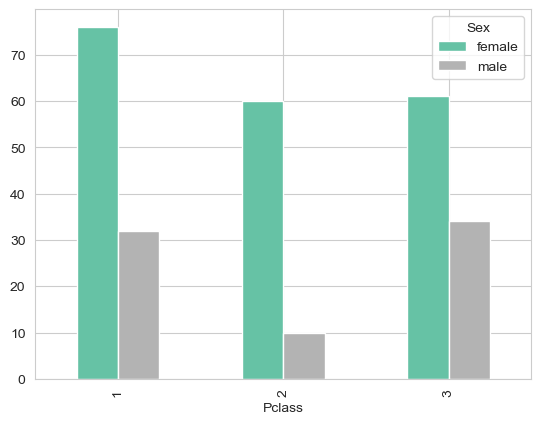

In [26]:
survived_passengers = df_train[df_train['Survived'] == 1]
survidedsex_vs_class = survived_passengers.groupby(['Sex', 'Pclass']).size().reset_index(name='counts')
survidedsex_vs_class.pivot(index='Pclass', columns='Sex', values='counts').plot.bar(colormap = 'Set2')

Survivals per age

In [27]:
# Filter the DataFrame for male and female passengers
male_age = df_train[df_train['Sex'] == 'male']['Age']
female_age = df_train[df_train['Sex'] == 'female']['Age']

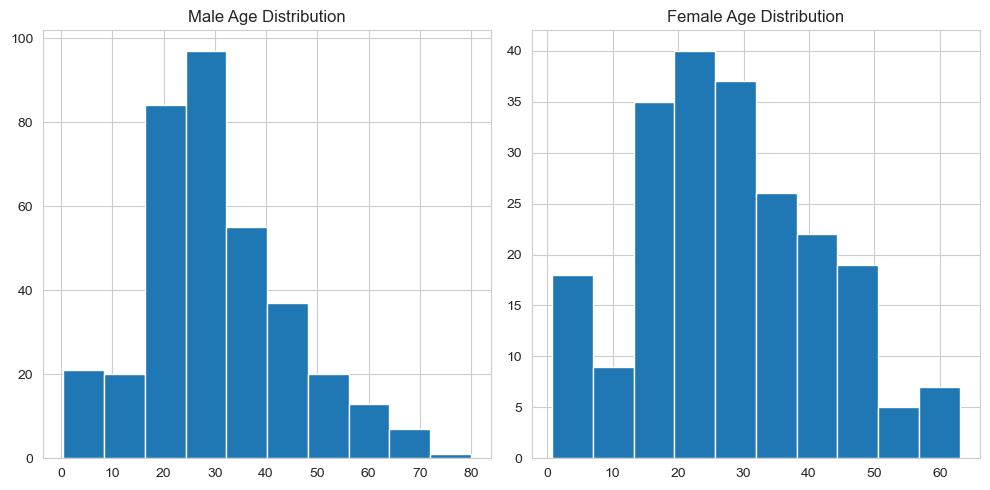

In [29]:
#age distribution 
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[1].hist(female_age,  label='Female')
axes[1].set_title('Female Age Distribution')


axes[0].hist(male_age, label = 'Male')
axes[0].set_title('Male Age Distribution')


plt.tight_layout()
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

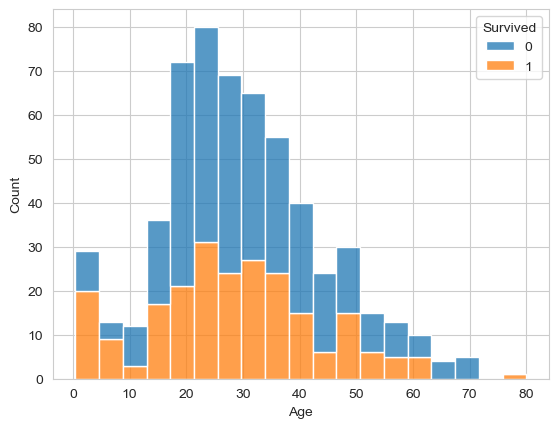

In [30]:
sns.histplot(data=df_train,
             x='Age',
             multiple='stack',
             hue = 'Survived'
            )

Age imputation method: evident from the plots above the age distribution of survived passengers is similar for both male and females, but the age distribution within Sex class is different, so it makes sense to take both into acccount when imputing missing values

In [31]:
#Fill age by mean grouped by class and sex
Xtrain['Age'] = Xtrain[['Age', 'Pclass', 'Sex']].groupby(['Pclass','Sex']).transform(lambda x: x.fillna(x.mean()))
Xtrain

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
702,703,3,"Barbara, Miss. Saiide",female,18.000000,0,1,2691,14.4542,NaN,C,0
776,777,3,"Tobin, Mr. Roger",male,26.117255,0,0,383121,7.7500,F38,Q,0
381,382,3,"Nakid, Miss. Maria (""Mary"")",female,1.000000,0,2,2653,15.7417,NaN,C,1
275,276,1,"Andrews, Miss. Kornelia Theodosia",female,63.000000,1,0,13502,77.9583,D7,S,1
16,17,3,"Rice, Master. Eugene",male,2.000000,4,1,382652,29.1250,NaN,Q,0
...,...,...,...,...,...,...,...,...,...,...,...,...
353,354,3,"Arnold-Franchi, Mr. Josef",male,25.000000,1,0,349237,17.8000,NaN,S,0
137,138,1,"Futrelle, Mr. Jacques Heath",male,37.000000,1,0,113803,53.1000,C123,S,0
494,495,3,"Stanley, Mr. Edward Roland",male,21.000000,0,0,A/4 45380,8.0500,NaN,S,0
430,431,1,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",male,28.000000,0,0,110564,26.5500,C52,S,1


In [32]:
#Do same imputations on validation set
Xval['Age'] = Xval[['Age', 'Pclass', 'Sex']].groupby(['Pclass','Sex']).transform(lambda x: x.fillna(x.mean()))

### Cabin ###
A big chunck of cabin classes are missing, to find best way to impute those let's check where are they missing more often

In [33]:
classes = df_train['Pclass'].value_counts()

In [34]:
#check the class of the passengers who have no Cabin number
missing_cabins = df_train[df_train['Cabin'].isna()]['Pclass'].value_counts()

In [37]:
missing_perclass = missing_cabins/classes * 100
missing_perclass

1    19.540230
2    91.666667
3    97.461929
Name: Pclass, dtype: float64

Cabin numbers are missing primaraly for 2, 3 classes, from domain kmowledge we can assume these classes could have no cabin number assigned, therefore we add new categorical value to existing ones - "unknown" 

In [38]:
#fill all missing cabins with new categorical value - 'unknown'
Xtrain['Cabin'] = Xtrain['Cabin'].fillna(value = 'unknown')

In [39]:
#repeat for validation set
Xval['Cabin'] = Xval['Cabin'].fillna(value = 'unknown')

## Embarked ## 
Hypothesis - if the data about passenger embarkment is missing then maybe that passenger never boarded and hence survived

In [40]:
df_train[df_train['Embarked'].isna()]
#both of the passenders indeed survived, so we will add a new value to this categorical feature and call it "unknown"

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1


In [41]:
Xtrain['Embarked'] = Xtrain['Embarked'].fillna("unknown")

In [42]:
Xval['Embarked']= Xval['Embarked'].fillna("unknown")

Now that the missing values are filled, moving on to closer analysis of the target and other features

In [43]:
df_train.value_counts('Survived') # count all survivors

Survived
0    439
1    273
dtype: int64

<Axes: xlabel='Survived'>

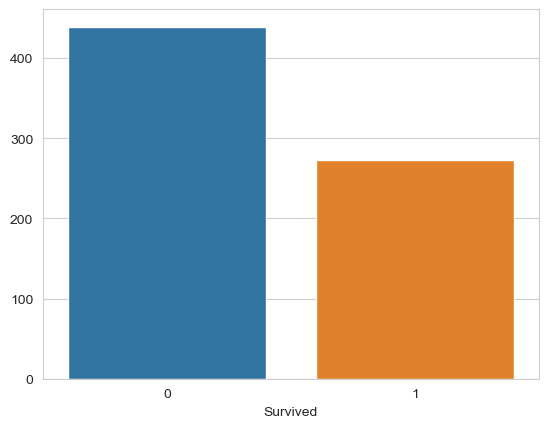

In [44]:
sns.barplot(data = df_train, x = 'Survived', y =df_train.value_counts('Survived'))

### Create titles ###
From domain knowledge we know that passengers of higher rank were more likely to survive than others, 
hence let's extract the titles and group them based on their meaning to have new categoris of passengers

In [45]:
df_train['Name']

702                        Barbara, Miss. Saiide
776                             Tobin, Mr. Roger
381                  Nakid, Miss. Maria ("Mary")
275            Andrews, Miss. Kornelia Theodosia
16                          Rice, Master. Eugene
                         ...                    
353                    Arnold-Franchi, Mr. Josef
137                  Futrelle, Mr. Jacques Heath
494                   Stanley, Mr. Edward Roland
430    Bjornstrom-Steffansson, Mr. Mauritz Hakan
589                          Murdlin, Mr. Joseph
Name: Name, Length: 712, dtype: object

In [46]:
# Extract all the titles and group them together to have new categories of passengers
def title_grouping(x):
    if x in ['mrs','mr','miss','master','dr','rev']:
        pass
    elif x in ['mlle','ms']:
        x = 'miss'
    elif x == 'mme':
        x = 'mrs'
    elif x in ['col','major','capt']:
        x = 'army'
    elif ['don','lady','the countess','sir','the count','madam','lord']:
        x = 'nobl'
    else:
        'unknown'
    return x   

Xtrain['Title'] = Xtrain['Name'].apply(title_grouping) 
Xval['Title'] = Xval['Name'].apply(title_grouping)

### Fare prices ###

(array([302., 147., 109.,  23.,  33.,  22.,  26.,   6.,  10.,   3.,   7.,
          6.,   1.,   0.,   0.,   0.,   4.,   3.,   0.,   2.,   6.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([  0.     ,  12.80823,  25.61646,  38.42469,  51.23292,  64.04115,
         76.84938,  89.65761, 102.46584, 115.27407, 128.0823 , 140.89053,
        153.69876, 166.50699, 179.31522, 192.12345, 204.93168, 217.73991,
        230.54814, 243.35637, 256.1646 , 268.97283, 281.78106, 294.58929,
        307.39752, 320.20575, 333.01398, 345.82221, 358.63044, 371.43867,
        384.2469 , 397.05513, 409.86336, 422.67159, 435.47982, 448.28805,
        461.09628, 473.90451, 486.71274, 499.52097, 512.3292 ]),
 <BarContainer object of 40 artists>)

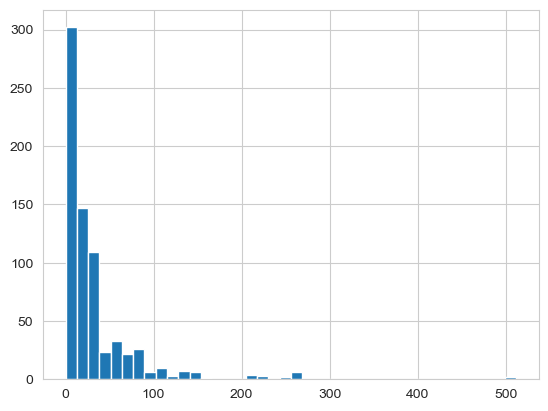

In [54]:
plt.hist(x=df_train['Fare'], bins=40)

<Axes: xlabel='Pclass', ylabel='Fare'>

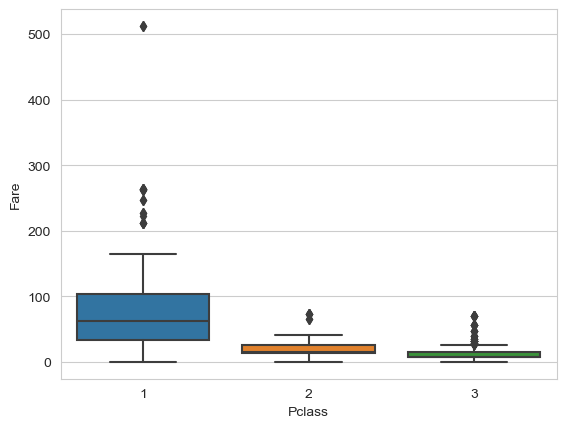

In [67]:
sns.boxplot(data= df_train, x = 'Pclass', y = 'Fare')

Fare prices have a number of outliers, the hypothesis is that this is due to the fact that the proice is calculated together for family groups 

In [78]:
#count family members travelling together
Xtrain['FamilySize'] = Xtrain['SibSp']+Xtrain['Parch'] +1

In [104]:
Xtrain['FamilySize']

702    2
776    1
381    3
275    2
16     6
      ..
353    2
137    2
494    1
430    1
589    1
Name: FamilySize, Length: 712, dtype: int64

In [105]:
Xtrain['Fare']

702    14.4542
776     7.7500
381    15.7417
275    77.9583
16     29.1250
        ...   
353    17.8000
137    53.1000
494     8.0500
430    26.5500
589     8.0500
Name: Fare, Length: 712, dtype: float64

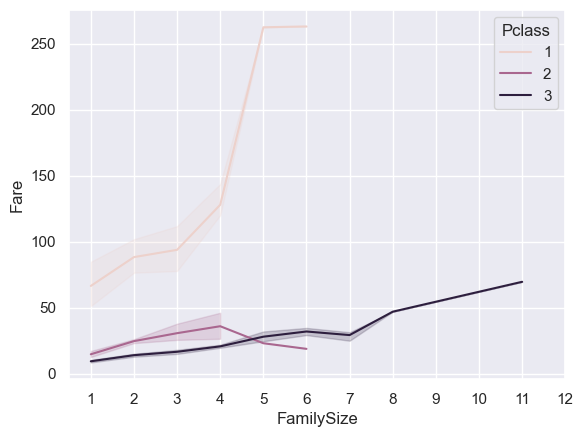

In [96]:
#check correlarion between family size and ticket price
sns.lineplot(Xtrain, x = 'FamilySize', y = 'Fare', hue = 'Pclass')
plt.xticks(range(1,13))
plt.show()

Plot above confirms this hypothesis as the fare is increasing with the family size regardless of the class. Hence, caclulating price per person to handle the outliers in Xtrain['Fare']

In [117]:
Xtrain['Fare']

702    14.4542
776     7.7500
381    15.7417
275    77.9583
16     29.1250
        ...   
353    17.8000
137    53.1000
494     8.0500
430    26.5500
589     8.0500
Name: Fare, Length: 712, dtype: float64

In [121]:
#engineer fare price per person 
Xtrain['FarePerPerson'] = Xtrain['Fare'] / Xtrain['FamilySize']

In [123]:
#same for validation set 
Xval['FarePerPerson'] = Xval['Fare'] / Xval['SibSp']+Xval['Parch'] +1

### Dropping unnecessary features

In [124]:
Xtrain

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title,FamilySize,FarePerPerson
702,703,3,"Barbara, Miss. Saiide",female,18.000000,0,1,2691,14.4542,unknown,C,0,nobl,2,7.227100
776,777,3,"Tobin, Mr. Roger",male,26.117255,0,0,383121,7.7500,F38,Q,0,nobl,1,7.750000
381,382,3,"Nakid, Miss. Maria (""Mary"")",female,1.000000,0,2,2653,15.7417,unknown,C,1,nobl,3,5.247233
275,276,1,"Andrews, Miss. Kornelia Theodosia",female,63.000000,1,0,13502,77.9583,D7,S,1,nobl,2,38.979150
16,17,3,"Rice, Master. Eugene",male,2.000000,4,1,382652,29.1250,unknown,Q,0,nobl,6,4.854167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,354,3,"Arnold-Franchi, Mr. Josef",male,25.000000,1,0,349237,17.8000,unknown,S,0,nobl,2,8.900000
137,138,1,"Futrelle, Mr. Jacques Heath",male,37.000000,1,0,113803,53.1000,C123,S,0,nobl,2,26.550000
494,495,3,"Stanley, Mr. Edward Roland",male,21.000000,0,0,A/4 45380,8.0500,unknown,S,0,nobl,1,8.050000
430,431,1,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",male,28.000000,0,0,110564,26.5500,C52,S,1,nobl,1,26.550000


In [ ]:
Xtrain = Xtrain.drop(['Name', 'Ticket', 'PassengerId'], axis =1) #final df for Xtrain

In [ ]:
Xtrain

In [ ]:
Xval

In [ ]:
Xval = Xval.drop(['Name', 'Ticket', 'PassengerId'], axis =1) #final Xval df

In [ ]:
Xval

### **Step 3** Create the pipline

**Spep 3.1** Categorise the features

In [ ]:
num_features = ['Age','Fare', 'Pclass', 'Sex','SibSp', 'Parch']

In [ ]:
cat_features = ['Cabin', 'Embarked', 'Title']

In [ ]:
num_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')), #just in case smth is missing fill it in
        ('scaling', StandardScaler())
    ])

In [ ]:
cat_transformer = Pipeline(
    steps=[
        ('onehot', OneHotEncoder(drop='first',handle_unknown = 'ignore'))
    ])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num_transformer', num_transformer, num_features), 
        ('cat_transformer', cat_transformer, cat_features)
    ])

**Spep 3.2**
**instantiate model**

In [ ]:
classifier_model = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression())
    ])

**Spep 3.3**
**train model**

In [ ]:
classifier_model.fit(Xtrain,ytrain)

**model validation** Train data

In [ ]:
training_acccuracy = classifier_model.score(Xtrain,ytrain)
print(f"training accuracy: {round(training_acccuracy, 6)}")

**model validation** Validation data

In [ ]:
test_acccuracy = classifier_model.score(Xval,yval) 
print(f"test accuracy: {round(test_acccuracy, 6)}")

## Step 4 run on train + validation

In [ ]:
X = pd.concat([Xtrain,Xval]) #add all the changes to X

In [ ]:
y = pd.concat([ytrain, yval]) # no need really, we did not change y.. 

In [ ]:
classifier_model.fit(X,y) #fit model on full set

In [ ]:
training_acccuracy = classifier_model.score(X,y)

print(f"training accuracy: {round(training_acccuracy, 6)}")

In [ ]:
full_data['Prediction']= classifier_model.predict(X)

In [ ]:
full_data

# Kaggle: check the test dataset

**Step 1** repeat the feature eng part on test set

In [ ]:
Xtest = test_for_kaggle

In [ ]:
#Sex mapping
Xtest['Sex'] = Xtest['Sex'].map({'female':0, 'male':1})

In [ ]:
#Title inputing
Xtest['Title'] = Xtest['Name'].apply(title_grouping) 

In [ ]:
#Age inputing
Xtest['Age'] = Xtest[['Age', 'Pclass', 'Sex']].groupby(['Pclass','Sex']).transform(lambda x: x.fillna(x.mean()))

In [ ]:
#Inputing missing cabins as new class
Xtest['Cabin'] = Xtest['Cabin'].fillna(value = 'unknown')

In [ ]:
#Eng fare price
Xtest['Fare'].apply(lambda x: Xtest['Fare']/(Xtest['SibSp']+Xtest['Parch']+1))

In [ ]:
#Inputting Embarktion with most frequent value
Xtest['Embarked'] = Xtest['Embarked'].transform(lambda x:x.fillna(x.value_counts().index[0]))

In [ ]:
#Dropping irrelevant columns
Xtest = Xtest.drop(['Name', 'Ticket', 'PassengerId'], axis =1)

In [ ]:
classifier_model.predict(Xtest)

In [ ]:
test_for_kaggle ['Survived'] = classifier_model.predict(Xtest)

In [ ]:
test_for_kaggle

***save to csv***

In [ ]:
test_for_kaggle[['PassengerId', 'Survived']].to_csv("log_reg.csv")

### Score: 0.76315


## Random forest

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 


In [ ]:
rfc_model = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=100))
    ])

In [ ]:
rfc_model.fit(X,y)

In [ ]:
rfc_model.score(X,y)

In [ ]:
rfc_model.predict(Xtest)

In [ ]:
test_for_kaggle ['Rfc_prediction'] = rfc_model.predict(Xtest)
test_for_kaggle

In [ ]:
test_for_kaggle[['PassengerId', 'Rfc_prediction']].to_csv("kaggle_rfc_upload.csv")

## Score: 0.75837

## Ensemble Models

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

models = [
          ('logreg', LogisticRegression()),
          ('forest', RandomForestClassifier(n_estimators=120)),
          ('svm', SVC(kernel='rbf'))
]
m = VotingClassifier(models)



In [ ]:
m_class = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', VotingClassifier(models))
    ])

In [ ]:
m_class.fit(X,y)

In [ ]:
m_class.score(X,y)

In [ ]:
test_for_kaggle['Survived'] = m_class.predict(Xtest) 

In [ ]:
test_for_kaggle[['PassengerId', 'Survived']].to_csv("kaggle_ensemble_upload.csv")

## Ensemble Score: 0.78468
